In [1]:
from dataloader import *
from model import *

/opt/miniforge3/envs/torch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
test_data_loader = getDataloader(input_folder='DRIVE/test/images')

In [3]:
device = torch.device("cpu")

In [4]:
save_path = './checkpoint/drive.pth'
model = torch.load(save_path)
model.to(device, dtype=torch.float32)
model.eval()

UNet(
  (downs): ModuleList(
    (0): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): DoubleConv(
      (c

In [5]:
one_batch_data = next(test_data_loader._get_iterator())
one_batch_data.to(device)

In [7]:
output = model(one_batch_data)

In [23]:
def show_result(input: torch.Tensor, output: torch.Tensor):
    input = np.moveaxis(input.detach().cpu().numpy(), 1, -1)
    output = np.moveaxis(output.detach().cpu().numpy(), 1, -1)
    
    num = input.shape[0]
    plt.figure(figsize=(num*5, 10))
    for row, data in enumerate([input, output]):
        for col, item in enumerate(data):
            plt.subplot(2, num, (row)*num+(col+1))
            plt.imshow(item, cmap='gray')
    plt.show()

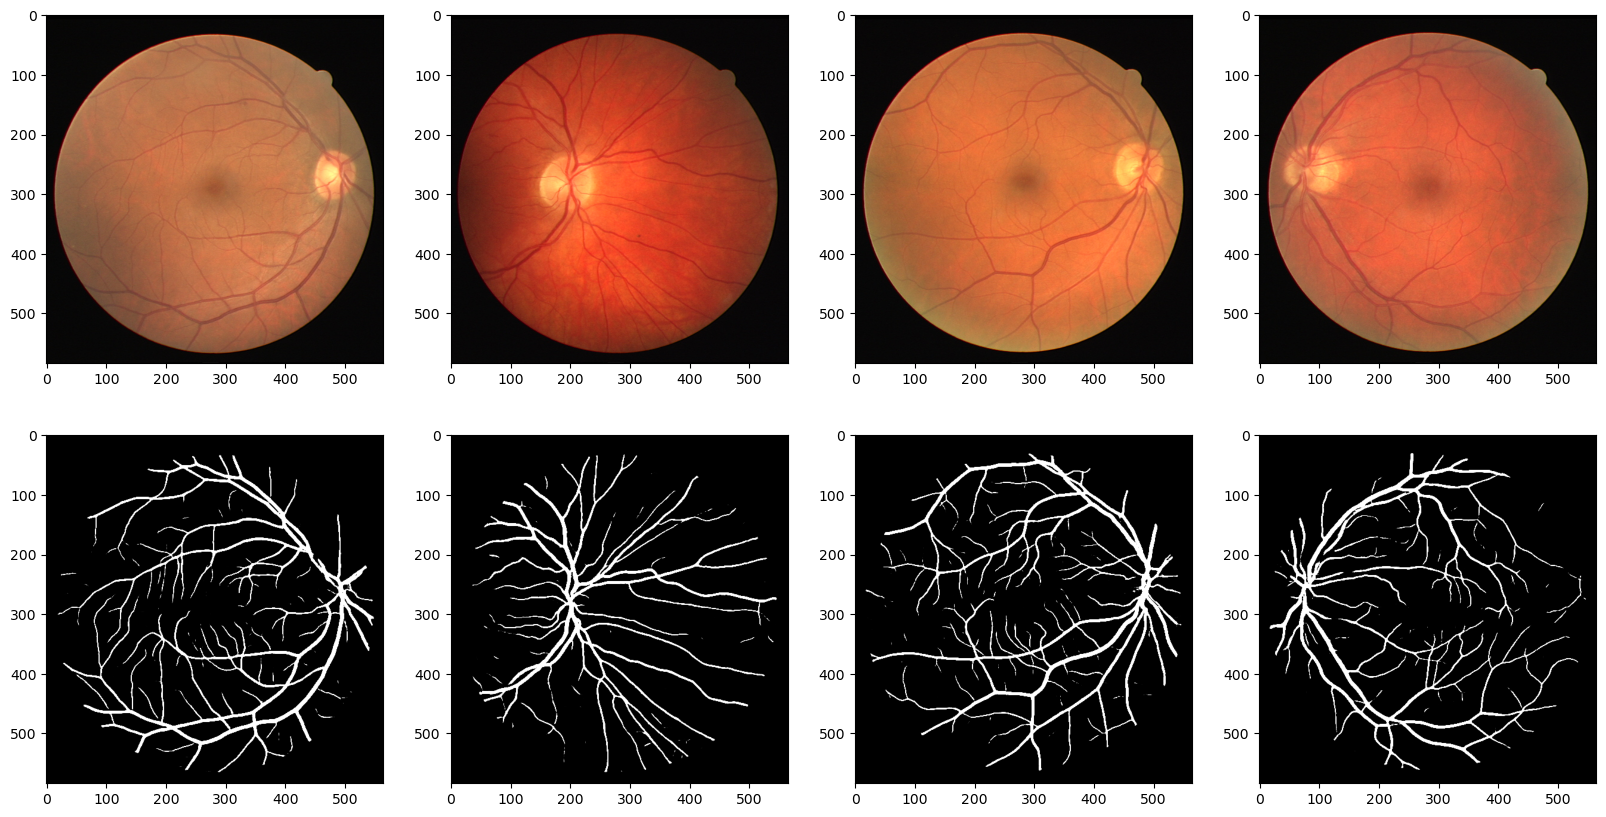

In [24]:
show_result(one_batch_data, output)